Before Training


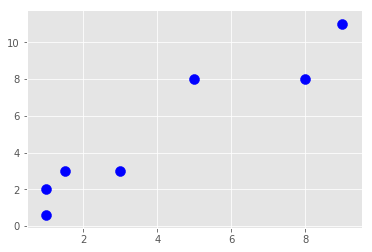

After Training


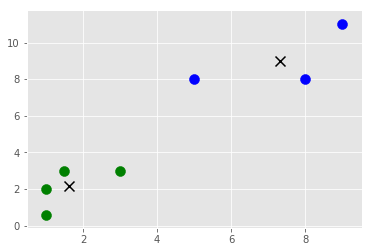

Testing


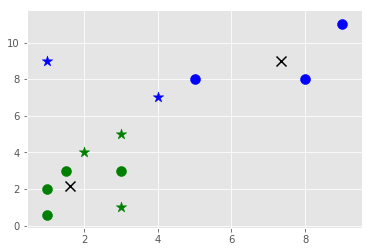

In [54]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
#
# the idea of this algorithm is find the centeroid points that determine each cluster, then how to find?
# first determine the number of cluster you want your data to classify to it (K).
# give the centroid points initail value then calc the destance between each point in dataset and the nearest
# center point, then make update be found the mean of each data for each center point.
# do this even reach to fixed center point (optimization process)
# 

class KMeans:

    def __init__(self, k=2, tol=0.001, max_iter=300):
        # k is the number of groups
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.colors=['g','b','r','y']
        
    def fit(self, data):
        
        self.centroids = {}
        
        # init centroids points
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        # satart Optimization process
        for i in range(self.max_iter):
            self.classifications = {}
            
            # init each cluster with empty list
            for i in range(self.k):
                self.classifications[i] = []
                
            for feature in data:
                distances = [np.linalg.norm(feature - self.centroids[i]) for i in self.centroids]
                cluster = np.argmin(distances)
                self.classifications[cluster].append(feature)
                
            prev_centroids = dict(self.centroids)
            # update
            for cluster in self.classifications:
                self.centroids[cluster] = np.average(self.classifications[cluster], axis=0)
                
            optimized = True
            for c in self.centroids:
                origin_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                
            if np.sum((current_centroid - origin_centroid)/origin_centroid*100.0) > self.tol:
                optimized = False
            
            if optimized:
                break
        
        
    
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[i]) for i in self.centroids]
        cluster = np.argmin(distances)
        return cluster
    
    
    def visualization(self, data, centroids=None, unknown =None, test=False):
        
        if centroids == None and unknown == None:
            # plot data before training
            [plt.scatter(data[i][0], data[i][1], marker="o",color="b", s=100) for i in range(len(data))]
            plt.show()
            return
        if test == False:
                # plot data after training
            [plt.scatter(self.centroids[x][0], self.centroids[x][1], marker="x", color="k", s=100) for x in self.centroids]
                
            [[plt.scatter(x[0],x[1],marker="o",color=self.colors[i],s=100) for x in self.classifications[i] ] for i in self.classifications]
            
        if test:
            [plt.scatter(self.centroids[x][0], self.centroids[x][1], marker="x", color="k", s=100) for x in self.centroids]
                
            [[plt.scatter(x[0],x[1],marker="o",color=self.colors[i],s=100) for x in self.classifications[i] ] for i in self.classifications]
            
            [plt.scatter(x[0],x[1],marker="*",color=self.colors[self.predict(x)], s=120) for x in unknown]
           
        plt.show()
                

            
            
            
            
if __name__ == '__main__':
    
    data = np.array([[1,2],
                      [1.5,3],
                      [5,8],
                      [8,8],
                      [1,0.6],
                      [9,11],
                      [3,3]])
    
    unknown_data = np.array([[3,5],[2,4],[3,1],[1,9],[4,7]])
    
    clf = KMeans()
    clf.fit(data)
    
    # visualize before training 
    print("Before Training")
    clf.visualization(data)
    # visualize after training
    print("After Training")
    clf.visualization(data,clf.centroids,unknown_data)
    # visualize after testing
    print("Testing")
    clf.visualization(data,clf.centroids,unknown_data,True)
        
        
        
        